In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the dataset from CSV
df = pd.read_csv(r"wavelet_kantamal.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Optional: Perform further analysis on the selected components
# e.g., clustering, classification, regression


In [2]:
selected_components

array([[-2.07775555e+00,  2.67475839e+00,  5.91693321e-01,
        -4.44760533e-01,  1.80051482e+00, -4.03354307e-02],
       [-2.18966282e+00,  2.67634307e+00,  7.55252132e-02,
        -6.75010295e-01,  1.58360181e+00, -5.57805222e-02],
       [-1.98129632e+00,  2.58526689e+00,  2.34162382e-01,
        -7.25711163e-01,  1.49198984e+00,  3.01838839e-01],
       ...,
       [ 8.27250375e-01,  2.35563470e+00, -4.79015966e-01,
         9.57741223e-02,  4.27445026e-01,  2.53296070e-03],
       [-4.01663037e-01,  2.49152589e+00,  1.07956327e-01,
         3.57263091e-02,  8.14970607e-01,  5.56901046e-02],
       [-1.24603095e+00,  2.74977875e+00, -4.88917287e-01,
        -4.27664297e-01,  1.31465079e+00, -2.94354042e-01]])

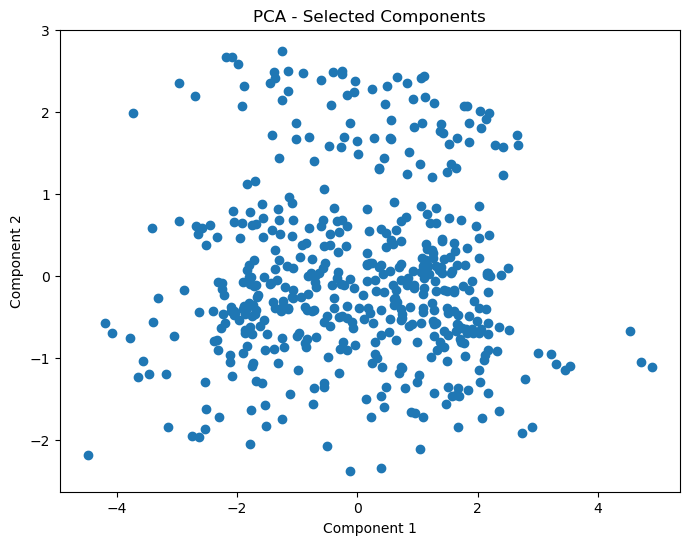

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Read the dataset from CSV
df = pd.read_csv(r"wavelet_kantamal.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name
y = df['spi']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Plot the selected components
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1])  # Plotting the first two components
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - Selected Components')
plt.show()




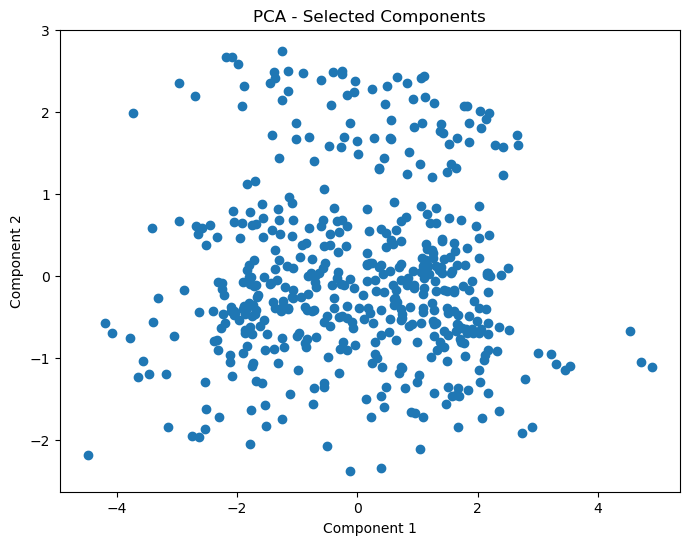

Mean Squared Error: 0.34


C:\Users\asitg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
# Read the dataset from CSV
df = pd.read_csv(r"wavelet_kantamal.csv")

# Separate the features from the target variable (if applicable)
X = df.drop('spi', axis=1)  # Replace 'target_variable' with the actual column name
y = df['spi']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to retain
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.95  # Retain 95% of the variance
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# Select the desired number of components
selected_components = X_pca[:, :num_components]

# Plot the selected components
plt.figure(figsize=(8, 6))
plt.scatter(selected_components[:, 0], selected_components[:, 1])  # Plotting the first two components
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - Selected Components')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_components, y, test_size=0.3, random_state=42)

# Create and train the ELM regression model using scikit-learn's MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(250,), activation='relu', random_state=32)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('wavelet_kantamal.csv')

# Separate the features and target variable
X = data.iloc[:, 1:].values
y = data['spi'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Select the top 'num_components' principal components
selected_features = X_pca[:, :num_components]

# Print the selected features
print("Selected features:")
print(selected_features)

# You can now use the selected features for further analysis or modeling


Selected features:
[[-2.07775555e+00  2.67475839e+00  5.91693321e-01 -4.44760533e-01
   1.80051482e+00 -4.03354307e-02]
 [-2.18966282e+00  2.67634307e+00  7.55252132e-02 -6.75010295e-01
   1.58360181e+00 -5.57805222e-02]
 [-1.98129632e+00  2.58526689e+00  2.34162382e-01 -7.25711163e-01
   1.49198984e+00  3.01838839e-01]
 ...
 [ 8.27250375e-01  2.35563470e+00 -4.79015966e-01  9.57741223e-02
   4.27445026e-01  2.53296070e-03]
 [-4.01663037e-01  2.49152589e+00  1.07956327e-01  3.57263091e-02
   8.14970607e-01  5.56901046e-02]
 [-1.24603095e+00  2.74977875e+00 -4.88917287e-01 -4.27664297e-01
   1.31465079e+00 -2.94354042e-01]]
